### What is a decision tree?
- Unterschied zu Logistic Regression (LR): definiert durch Koeffizienten, den sog. Parametern
- decision tree: nicht-parametrisch
- Machine Learning Algorithmen: immer entweder parametrisch oder nicht-parametrisch
- leicht interpretierbar
- Frage-Abfolgen bis zum Ziel, der Vorhersage
- Aufbau: Wurzel (Basis), interne Knoten (haben Features), Blätter (sind die Vorhersagen) 
- bei bestimmter Fragestellung: Baum von oben nach unten durchlaufen
- viele decision trees für mehrere Datensets möglich

### How to build a decision tree?
- über Informationsgehalt: gini impurity und entropy definieren
- purity (= homogeneity): alle Passagiere, die gestorben sind auf eine Seite, alle die überlebt haben auf die andere Seite => purity wird verwendet, um den Informationsgehalt zu berechnen => Set ist pure, wenn alle Datenpunkte der selben Klasse anghören (alle die überleben vs. alle die nicht überleben
- möglichst so aufteilen, dass Unterschiede deutlich erkennbar sind: 100 dp wird zu 50 + 50 => links 10 überlebt, 40 nicht; rechts 40 überlebt, 10 nicht => daher nicht: 50 überlebt, 50 nicht
- Gini Impurity: über subset berechnet zwischen 0 und 0.5, wo 0.5 impure ist und 0 pure => Formel: gini = 2 x p x (1-p)

##### Gini Impurity

In [1]:
#beispiel zu gini
#links: <=30 überlebt: 197, tot: 328   
surv_lt30 = 197
not_surv_lt30 = 328
percent_surv_lt30 = surv_lt30/(surv_lt30+not_surv_lt30)
print(percent_surv_lt30)

percent_not_surv_lt30 = 1- percent_surv_lt30
print(percent_not_surv_lt30)

gini_lt30 = 2*percent_surv_lt30*percent_not_surv_lt30
print(gini_lt30)

#rechts: >30 überlebt 145, tot: 217
gini_gt30 = 2*145/(145+217)*217/(145+217)
print(gini_gt30)

#ergebnis: werte liegen zu nah bei 0.5 (impure), anderes set verwenden, sofern da werte besser sind

0.37523809523809526
0.6247619047619047
0.4688689342403628
0.4802203839931626


##### Entropy
- weiteres Maß für Reinheit (purity)
- zwischen 1 (komplett unrein) und 0 (komplett rein)
- Formel: p*log2p + (1-p)log2(1-p)

In [2]:
from math import log2
#beispiel zu entropy

#links: <=30 überlebt: 197, tot: 328   
p = 197/(197+328)
entropy_left = -(p*log2(p) + (1-p)*log2(1-p))
print(entropy_left)

#rechts: >30 überlebt 145, tot: 217
p = 145/(145+217)
entropy_right = -(p*log2(p) + (1-p)*log2(1-p))
print(entropy_right)


0.9546092964627468
0.971272860860505


##### Informationsgehalt
- links <=30: ü197, t328
- rechts >30: ü145, t217
1. gini = 2 * ü(197+328)/gesamtzahl(887) * t(328+217)/gesamtzahl(887)
2. ig = gini - links(525)/gesamt(887) * gini(links) - rechts(362)/gesamt(887) * gini(rechts)

In [3]:
gini = 2 * 342/887 * 545/887
print(gini)
ig = 0.4738 - 525/887 * 0.4689 - 362/887 * 0.4802 #je höher gini, desto höher ist ig
print(ig)

0.47381124574049055
0.00028827508455472883


##### Decisision Tree aufbauen
- für jeden Wert einen Vergleich durchführen, z.B. 89 für Alter (88 Splits), 248 für Fare (247 Splits) etc.
- daraus höchsten Informationsgehalt bestimmen
- unabhängig davon noch Infogehalt für jeweils Frauen und Männer bestimmen

We need to try all of these potential splits:
1. Sex (male | female)
2. Pclass (1 or 2 | 3)
3. Pclass (1 | 2 or 3)
4. Age (0 | >0)
5. Age (<=1 | >1)
6. Age (<=2 | >2)
7. etc…. 

### Vorhersagen treffen über einen Decision Tree
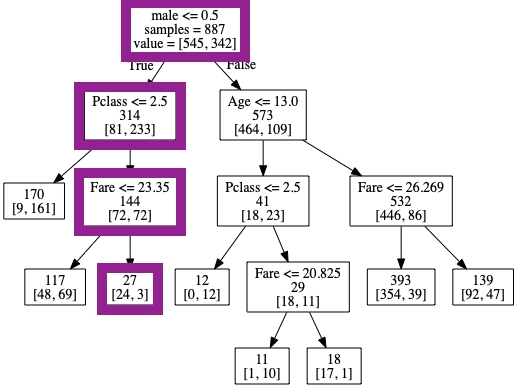
- male <= 5  ===  female
- Beispiel =>   Sex female, Pclass 3, Fare 25, Age 30
- female True = links, Pclass 3 False = rechts, Fare 25 False = rechts
- Ergebnis: 27 [24, 3] 27 Menschen gesamt => 24 tot, 3 überlebt

### Decision Trees in Scikit-learn

##### Vorhersage für ausgewählten Passagier machen

In [4]:
#decision tree import in scikit
from sklearn.tree import DecisionTreeClassifier

#zusätzliche importe, die benötigt werden
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#datenzugriff, ob überlebt
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

#random_state in train/test-split, dass nach jedem test-lauf der gleich split gemacht wird
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model = DecisionTreeClassifier() #modell braucht einen dec.tree-klassifizierer
model.fit(X_train, y_train) #trainiert das modell
print(model.predict([[3, True, 22, 1, 0, 7.25]])) #vorhersage für passagier mit folgenden daten:
#[1./2./3.klasse, männlich?, alter, bruder/ehepartner, eltern/kind, bezahlter_preis]

[0]


##### Score auf Decision Tree Modell anwenden

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))
print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

'''We can use k-fold cross validation to get an accurate measure of the metrics and compare the values with a Logistic Regression model. We use a random_state when creating the KFold object so that we will get the same results every time.
You can see that the accuracy and precision of the Logistic Regression model is higher, and the recalls of the two models are about the same. '''

Decision Tree
  accuracy: 0.7789817812480162
  precision: 0.7157042170101872
  recall: 0.7089795008912656
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


'We can use k-fold cross validation to get an accurate measure of the metrics and compare the values with a Logistic Regression model. We use a random_state when creating the KFold object so that we will get the same results every time.\nYou can see that the accuracy and precision of the Logistic Regression model is higher, and the recalls of the two models are about the same. '

##### Gini vs Entropy

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True) #k-fold, um gleiche train- und test-splits zu verwenden
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X): #k-fold-cross-validation
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()
    
'''We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions. It’s rare to find a dataset where the choice would make a difference.'''

Decision Tree - gini
accuracy: 0.772316384180791
precision: 0.702960796513428
recall: 0.7185146994719821 


Decision Tree - entropy
accuracy: 0.7722402082143083
precision: 0.6998995814087466
recall: 0.7110182338618241 




'We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions. It’s rare to find a dataset where the choice would make a difference.'

##### Decision Trees grafisch darstellen lassen

In [24]:
#als erstes importieren 'graphviz'-export für datei-konversion
from sklearn.tree import export_graphviz
#jetzt graphiz importieren für konversions-vorgang
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

#für export, feature_names für liste der features, grafiken werden immer als .dot-files gespeichert
dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
#erstellt png und säubert danach datei-müll von konversion
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'

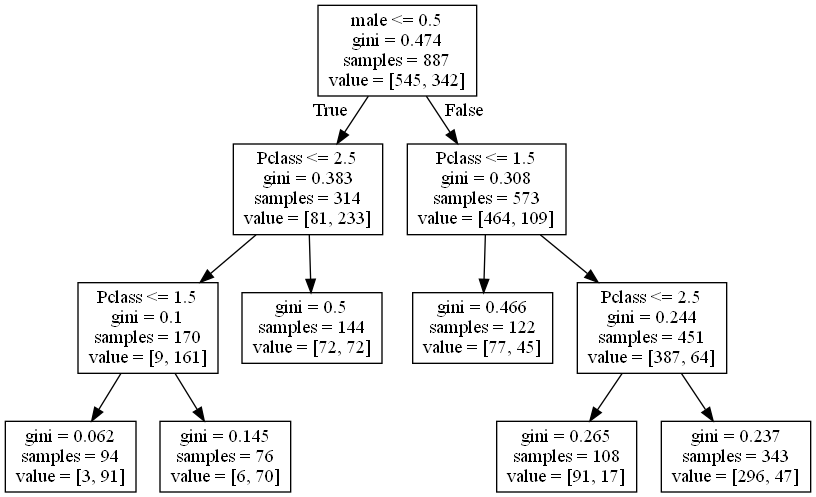

### Überanpassung (overfitting) bei Decision Trees
- Baum verkleinern
- Verkleinerungsmethoden beim Pre-Pruning (vorzeitiges Zurechtschneiden): max. Tiefe (Tiefe 3 = nur 3 splits), Blattgröße (kein split wenn gewisse Schwelle vorhanden ist), Anzahl Blatt-Knoten (Blatt-Knoten begrenzen)
- Achtung: bei zu viel Verkleinerung kommt es zur Unteranpassung (underfitting)

### Zurechtschneiden (pruning) mit Scikit-learn
- 3 Techniken: Technik1 (Tiefe über "max_depth"), Technik2 (Blätter mit weniger Datenpunkten vermeiden über "min_samples_leaf"), Technik3 (Knoten begrenzen über "max_leaf_nodes")
- Beispiel: dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)

##### Grid Search
- Nutzung von cross validation und Maßeinheiten-Vergleich
- grid search ist in Scikit integriert und sucht "intuitiv" die besten Werte für uns heraus

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
#importieren der klasse grid search
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

#param_grid enthält alle möglichen werte
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier() #wichtig: wieder den dt-klassifizierer verwenden!
#verwendetes maß ist f1 score für k-fold cross validation wird die 5 genommen
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
#grid search als model umsetzen
gs.fit(X, y)
#.best_params_ sucht das gewinner-modell heraus
print("best params:", gs.best_params_)
#.best_score_ gibt den treffer-wert des besten modells aus
print("best score:", gs.best_score_)

#individueller hinweis zu anzahl der modelle, die verglichen werden
count_models = len(param_grid['max_depth']) * len(param_grid['min_samples_leaf'] * len(param_grid['max_leaf_nodes']) ) 
print(f'Max. Anzahl verglichener Modelle:', count_models)

'''Hinweis: There are often a few models that have very similar performance. If you run this multiple times you might get slightly different results depending on the randomness of how the points are distributed among the folds. Generally if we have multiple models with comparable performance, we’d choose the simpler model.'''

best params: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
best score: 0.7734310143952028
Max. Anzahl verglichener Modelle: 24


'Hinweis: There are often a few models that have very similar performance. If you run this multiple times you might get slightly different results depending on the randomness of how the points are distributed among the folds. Generally if we have multiple models with comparable performance, we’d choose the simpler model.'

### Vor- und Nachteile von Decision Trees
- DT sind langsam zu trainieren, aber schnell in der Vorhersage
- Schneide-Methoden (pruning) machen Tree kleiner und vermeiden Überanpassung (overfitting), da DT anfällig für overfitting sind
- DT sind leicht interpretierbar (auch für Nicht-Techniker), z.B. Begründung, ob Person Leih-Geld von Bank bekommen sollte oder nicht